In [2]:
#Title: Energy forecasting using LSTM Networks
#Author: Arslan Ahmed (arslan.m.ahmed@gmail.com)
#Date: 18th Aug, 2018

#import all packages that we may need

import sys 
 # linear algebra
from scipy.stats import randint
import pandas as pd # data processing
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn import preprocessing # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
from scipy import signal
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from keras.regularizers import L1L2

import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## for Deep-learing:
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from pandas import concat
import matplotlib.dates as md
from keras.layers.normalization import BatchNormalization

from tsfresh import extract_relevant_features
from keras import regularizers
from pandas.plotting import autocorrelation_plot

import time
import math

import pulp
from pulp import *

C:\Users\Arslan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Arslan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#read energy data

df_e = pd.read_csv('MIT_weather_energy__Apt2_3years_realData.csv', parse_dates=['time'], infer_datetime_format=True, na_values=['nan','?'], index_col='time')

In [4]:
#select data from 
df=df_e['2015-07-28':'2015-12-31']
no_of_timesteps=3*24*2
print_till=3*24*2

In [5]:
df=df.resample('30min').mean()

In [16]:
# 1 layer
neurons1=["27", "90", "180", "360"]
neurons2=["27,5","27,27","180,45","180,180","360,90"]
neurons3=["27,6,2","27,27,27","180,45,10","180,180,180","360,180,90"]
neurons4=["180,90,45,20"]

rmse1=[87.17,88.63,89.1,88.23]
rmse2=[87.57,88.52,88.34,91.51,85.47]
rmse3=[89.13,87.77,84.21,87.75,87.68]
rmse4=[82.88]

rmse27=[87.17,88.52,87.77]
rmse180=[89.1,91.51,87.75]

time1=[5,9,25,36]
time2=[7,20,38,42,50]
time3=[17,31,41,57,62]
time4=[60]

layers=[1,2,3,4]


In [17]:
rmse1[:]=[round((100-x)/100, 2) for x in rmse1]
rmse2[:]=[round((100-x)/100, 2) for x in rmse2]
rmse3[:]=[round((100-x)/100, 2) for x in rmse3]
rmse4[:]=[round((100-x)/100, 2) for x in rmse4]

rmse27[:]=[round((100-x)/100, 2) for x in rmse27]
rmse180[:]=[round((100-x)/100, 2) for x in rmse180]

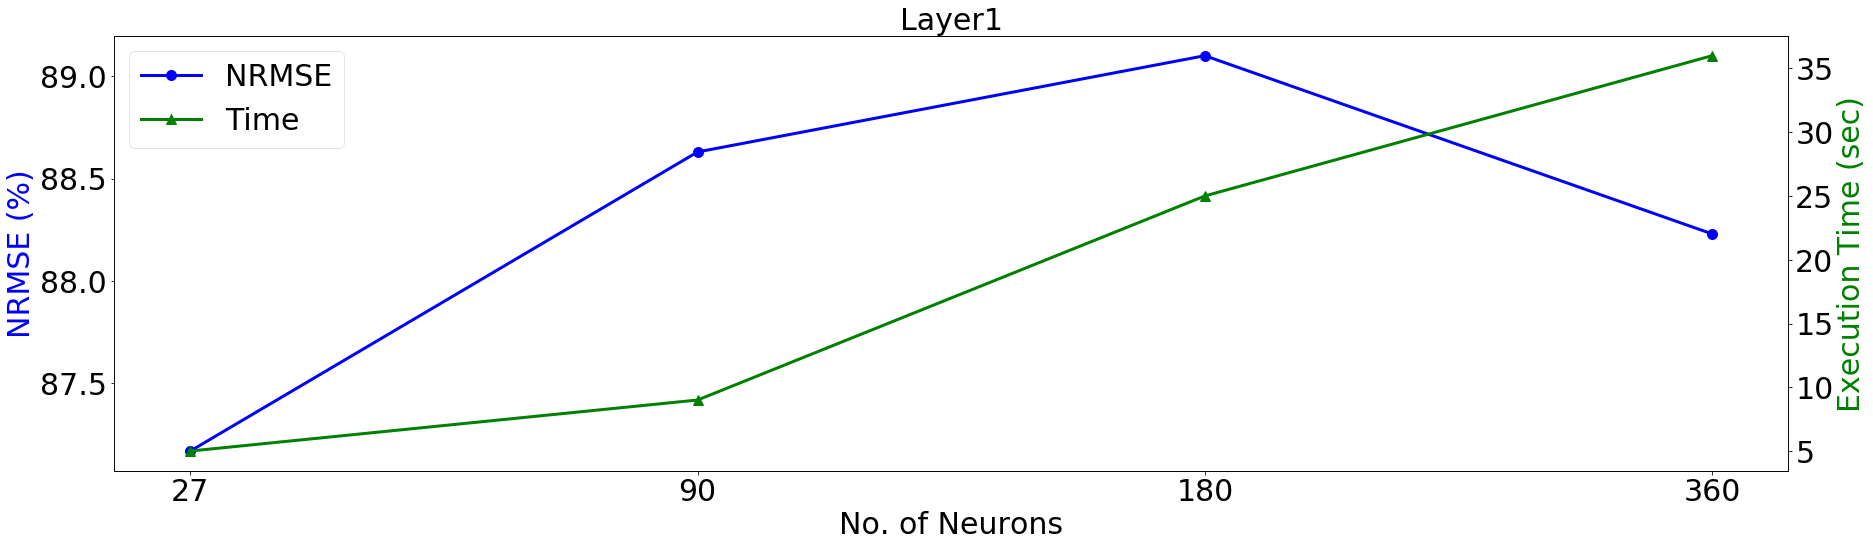

In [6]:
#Layer1 - Lineplot
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons1))
y= neurons1
plt.xticks(x, y, rotation=80)

lns1=ax1.plot(rmse1, 'bo-',label='NRMSE', linewidth=3, markersize=10)
lns2=ax2.plot(time1,'g^-',label='Time', linewidth=3, markersize=10)

#legends
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', fontsize=30,framealpha=0.5)


# plt.plot(index_test[0:print_till], actual_test[0:print_till],'co-',label='True Test data', linewidth=3)
# plt.plot(index_test[0:print_till], predicted_test[0:print_till],'ro-', label='Predicted Test data', linewidth=3)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE (%)', color='b', fontsize=30)
ax2.set_ylabel('Execution Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)


#plt.ylim(ymin=x_min,ymax=x_max)
plt.title("Layer1", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer1.pdf', bbox_inches='tight')
plt.show()

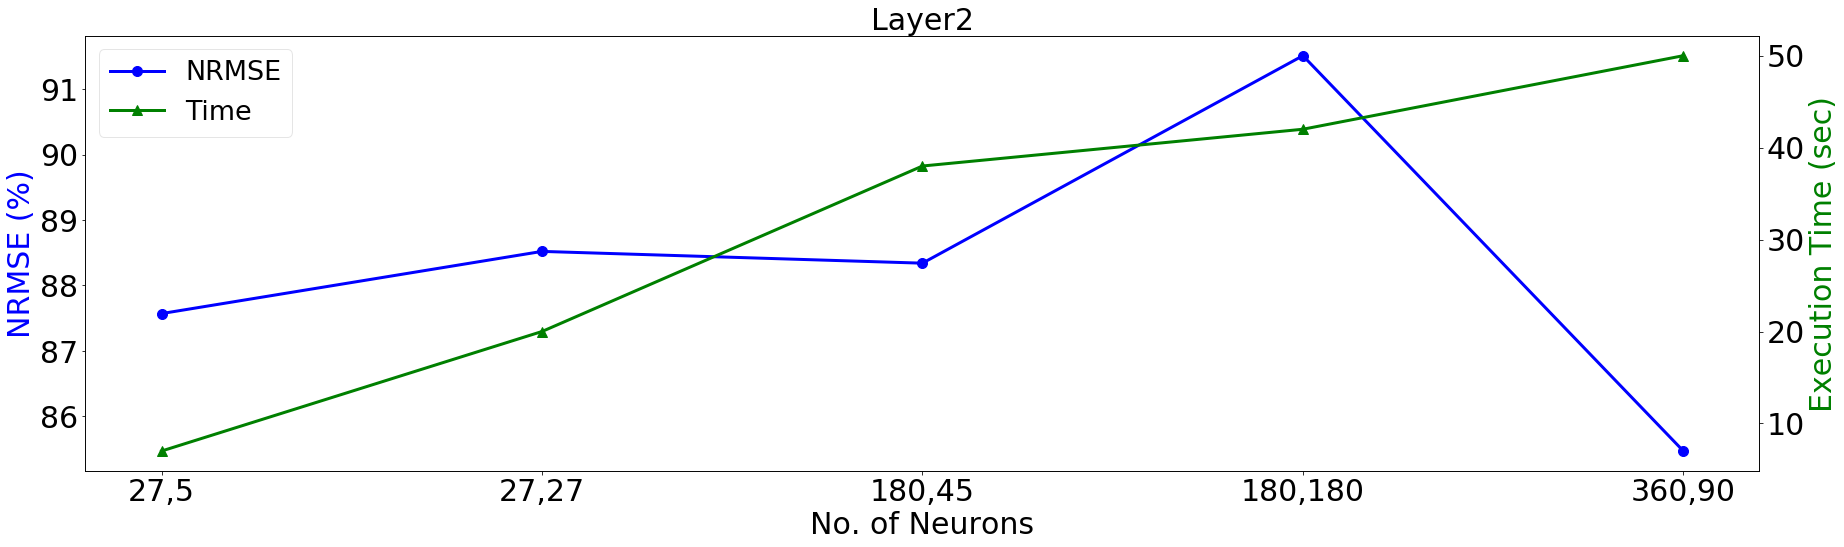

In [7]:
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons2))
y= neurons2
plt.xticks(x, y, rotation=80)

lns1=ax1.plot(rmse2, 'bo-',label='NRMSE', linewidth=3, markersize=10)
lns2=ax2.plot(time2,'g^-',label='Time', linewidth=3, markersize=10)

#legends
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE (%)', color='b', fontsize=30)
ax2.set_ylabel('Execution Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)

plt.title("Layer2", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer2.pdf', bbox_inches='tight')
plt.show()

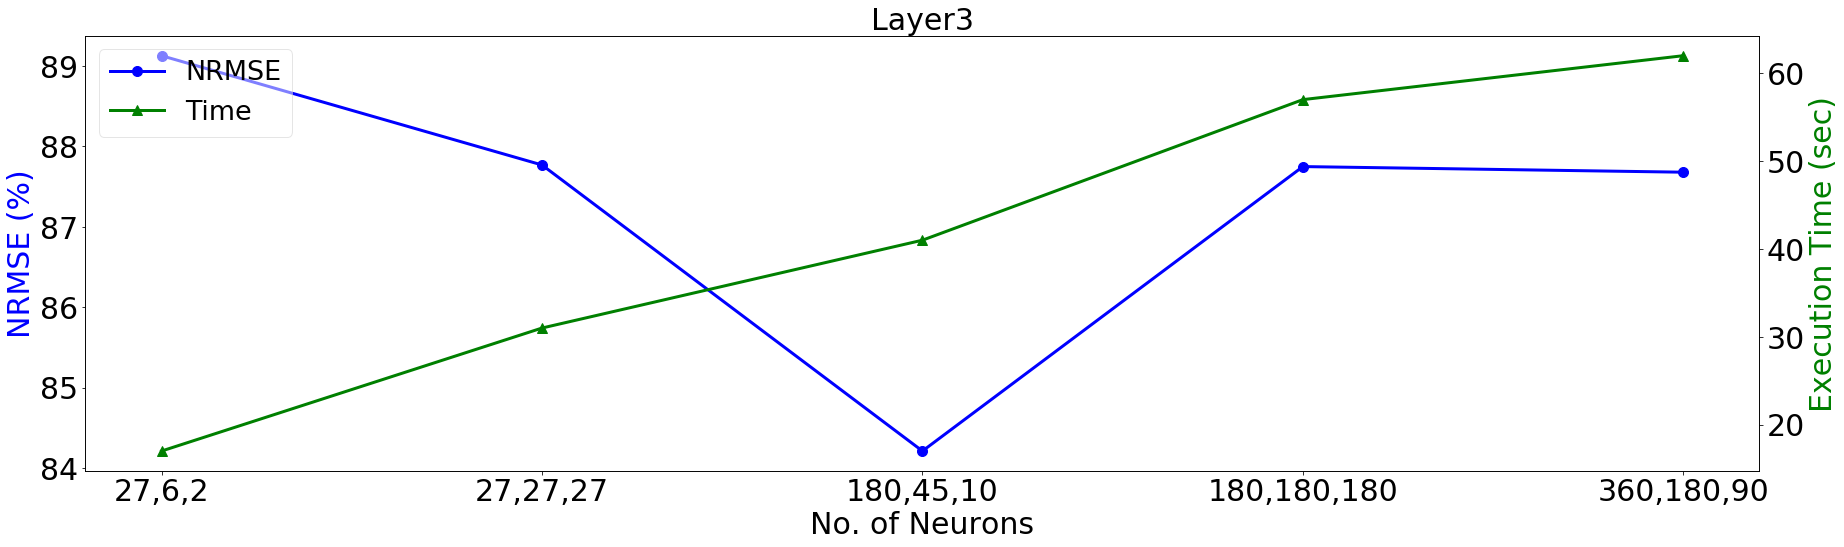

In [8]:
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons3))
y= neurons3
plt.xticks(x, y, rotation=80)

lns1=ax1.plot(rmse3, 'bo-',label='NRMSE', linewidth=3, markersize=10)
lns2=ax2.plot(time3,'g^-',label='Time', linewidth=3, markersize=10)

#legends
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE (%)', color='b', fontsize=30)
ax2.set_ylabel('Execution Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)

plt.title("Layer3", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer3.pdf', bbox_inches='tight')
plt.show()

C:\Users\Arslan\Anaconda3\lib\site-packages\matplotlib\legend.py:593: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x0000026E2F5AB908> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
C:\Users\Arslan\Anaconda3\lib\site-packages\matplotlib\legend.py:593: UserWarning: The handle <matplotlib.patches.Rectangle object at 0x0000026E2F5ABBE0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


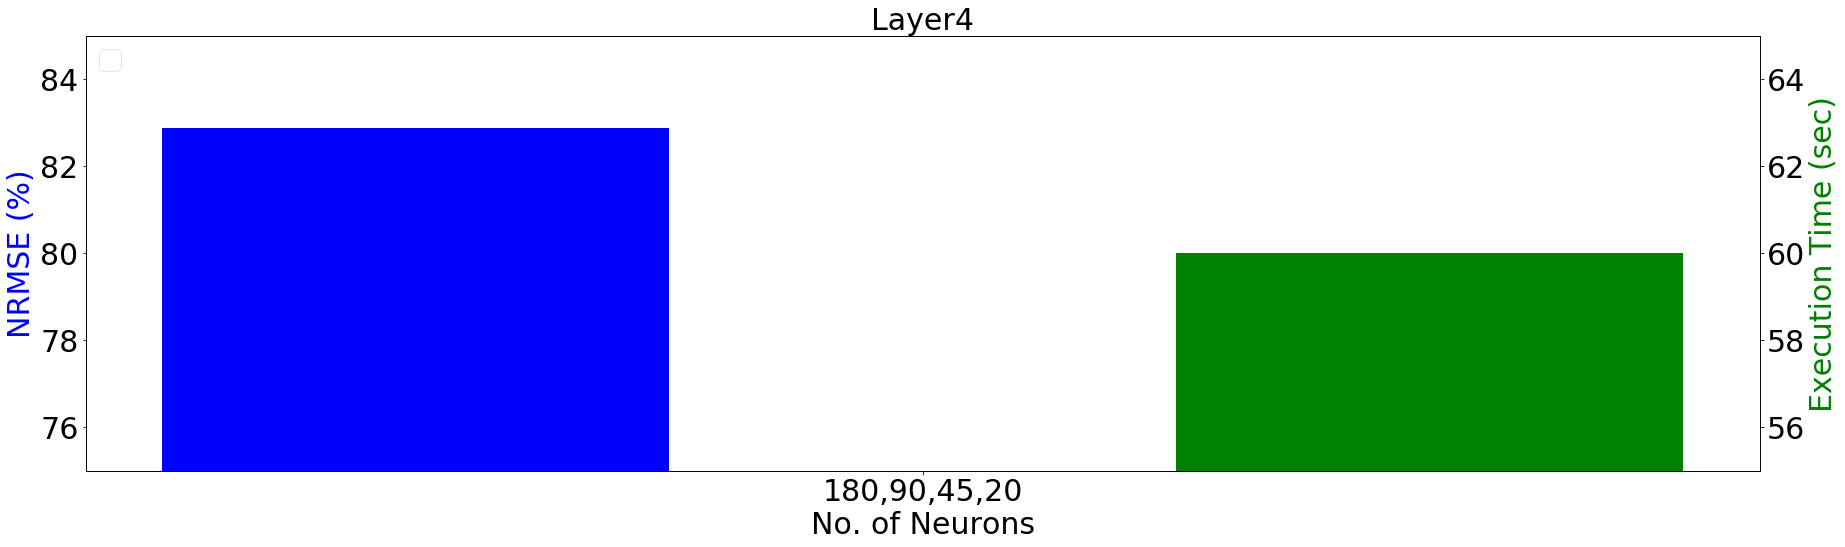

In [9]:
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons4))
y= neurons4
plt.xticks(x, y, rotation=80)

w=0.03
lns1=ax1.bar(x-w, rmse4, color='b',label='NRMSE', width=w)
lns2=ax2.bar(x+w, time4,color='g',label='Time', width=w)

#legends
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE (%)', color='b', fontsize=30)
ax2.set_ylabel('Execution Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)

plt.title("Layer4", fontsize=30)
ax1.set_ylim(ymin=75,ymax=85)
ax2.set_ylim(ymin=55,ymax=65)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer4.pdf', bbox_inches='tight')
plt.show()

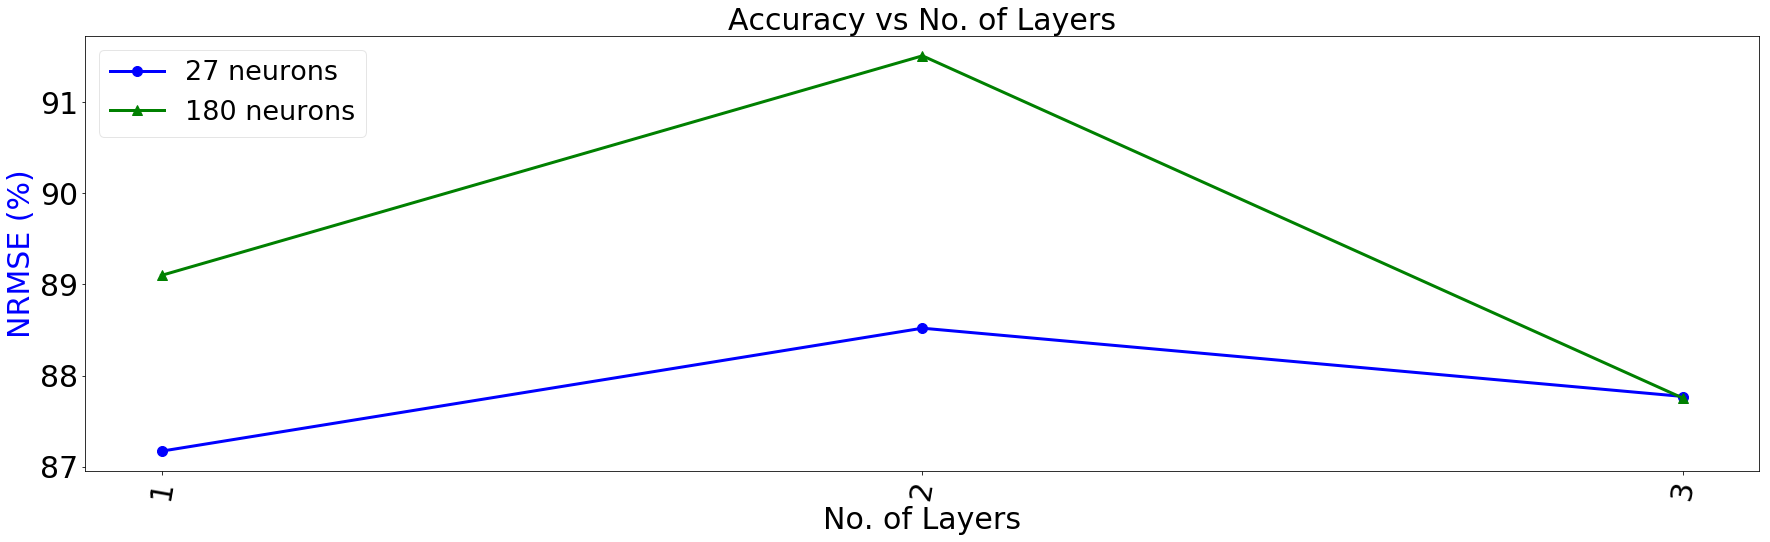

In [10]:
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)

x=np.arange(0,len(layers)-1)
y= layers
plt.xticks(x, y, rotation=80)

lns1=ax1.plot(rmse27, 'bo-',label='27 neurons', linewidth=3, markersize=10)
lns2=ax1.plot(rmse180,'g^-',label='180 neurons', linewidth=3, markersize=10)

#legends
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Layers', fontsize=30)
ax1.set_ylabel('NRMSE (%)', color='b', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)

plt.title("Accuracy vs No. of Layers", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layers.pdf', bbox_inches='tight')
plt.show()

In [11]:
####################################                BAR PLOTS           #####################################





####################################                BAR PLOTS            #####################################   

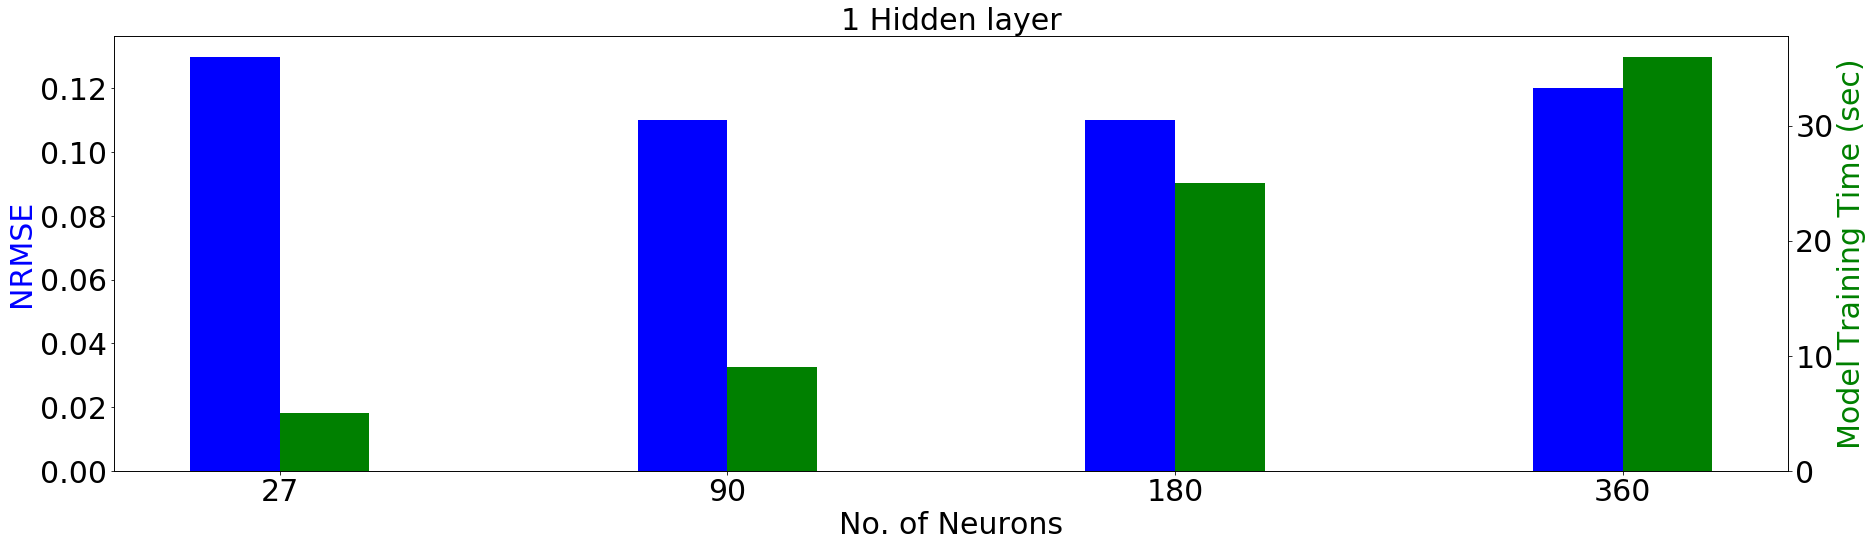

In [26]:
#Layer1-bar plot
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons1))
y= neurons1
plt.xticks(x, y, rotation=80)

w=0.2
lns1=ax1.bar(x-0.5*w,rmse1, color='b',label='NRMSE', width=w)
lns2=ax2.bar(x+0.5*w,time1,color='g',label='Time', width=w)

#legends
lns = [lns1,lns2]
labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE', color='b', fontsize=30)
ax2.set_ylabel('Model Training Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)


lowY1 = min(rmse1)
highY1 = max(rmse1)
lowY2 = min(time1)
highY2 = max(time1)
# ax1.set_ylim([math.ceil(lowY1-0.5*(highY1-lowY1)), math.ceil(highY1+0.5*(highY1-lowY1))])
# ax2.set_ylim([math.ceil(lowY2-0.5*(highY2-lowY2)), math.ceil(highY2+0.5*(highY2-lowY2))])

plt.title("1 Hidden layer", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer1.pdf', bbox_inches='tight')
plt.show()

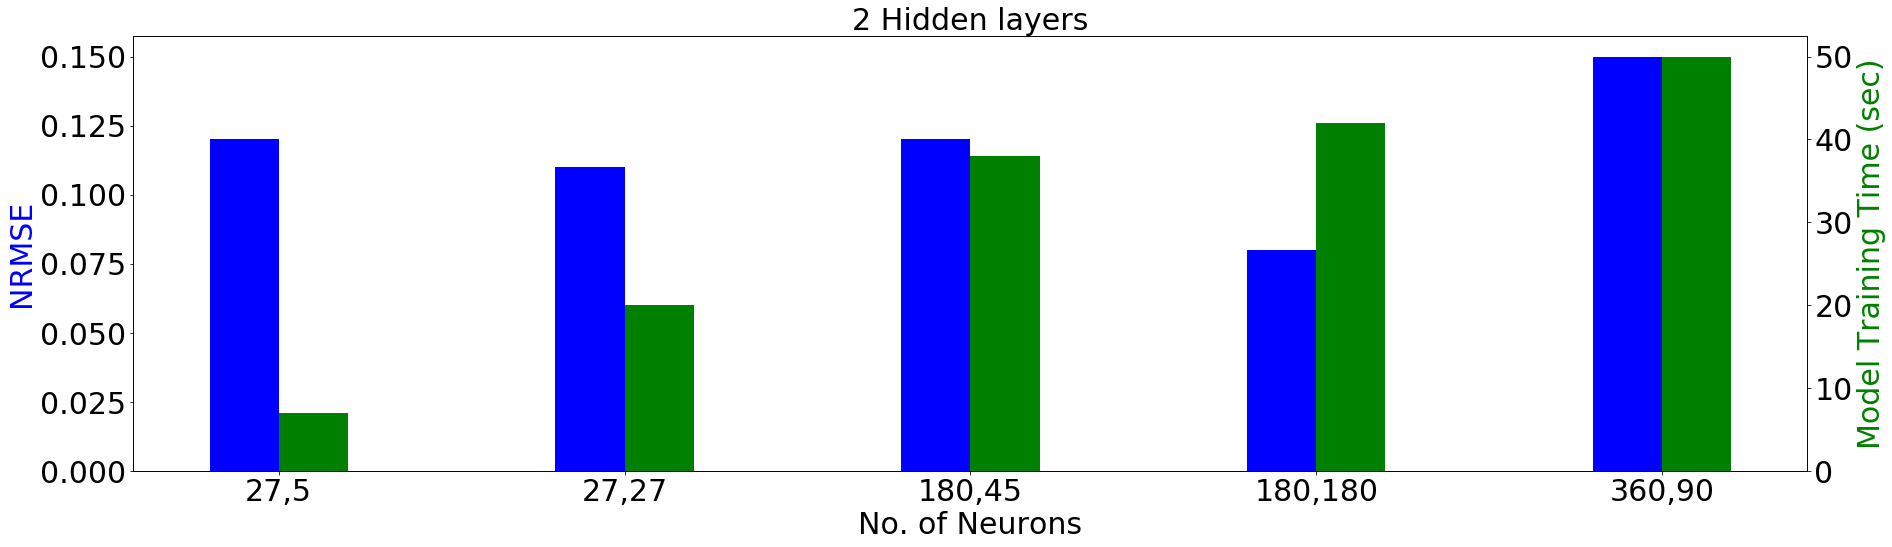

In [22]:
#Layer2-bar plot
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons2))
y= neurons2
plt.xticks(x, y, rotation=80)

w=0.2
lns1=ax1.bar(x-0.5*w,rmse2, color='b',label='NRMSE', width=w)
lns2=ax2.bar(x+0.5*w,time2,color='g',label='Time', width=w)

#legends
lns = [lns1,lns2]
labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE', color='b', fontsize=30)
ax2.set_ylabel('Model Training Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)


lowY1 = min(rmse2)
highY1 = max(rmse2)
lowY2 = min(time2)
highY2 = max(time2)
# ax1.set_ylim([math.ceil(lowY1-0.5*(highY1-lowY1)), math.ceil(highY1+0.5*(highY1-lowY1))])
# ax2.set_ylim([math.ceil(lowY2-0.5*(highY2-lowY2)), math.ceil(highY2+0.5*(highY2-lowY2))])

plt.title("2 Hidden layers", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer2.pdf', bbox_inches='tight')
plt.show()

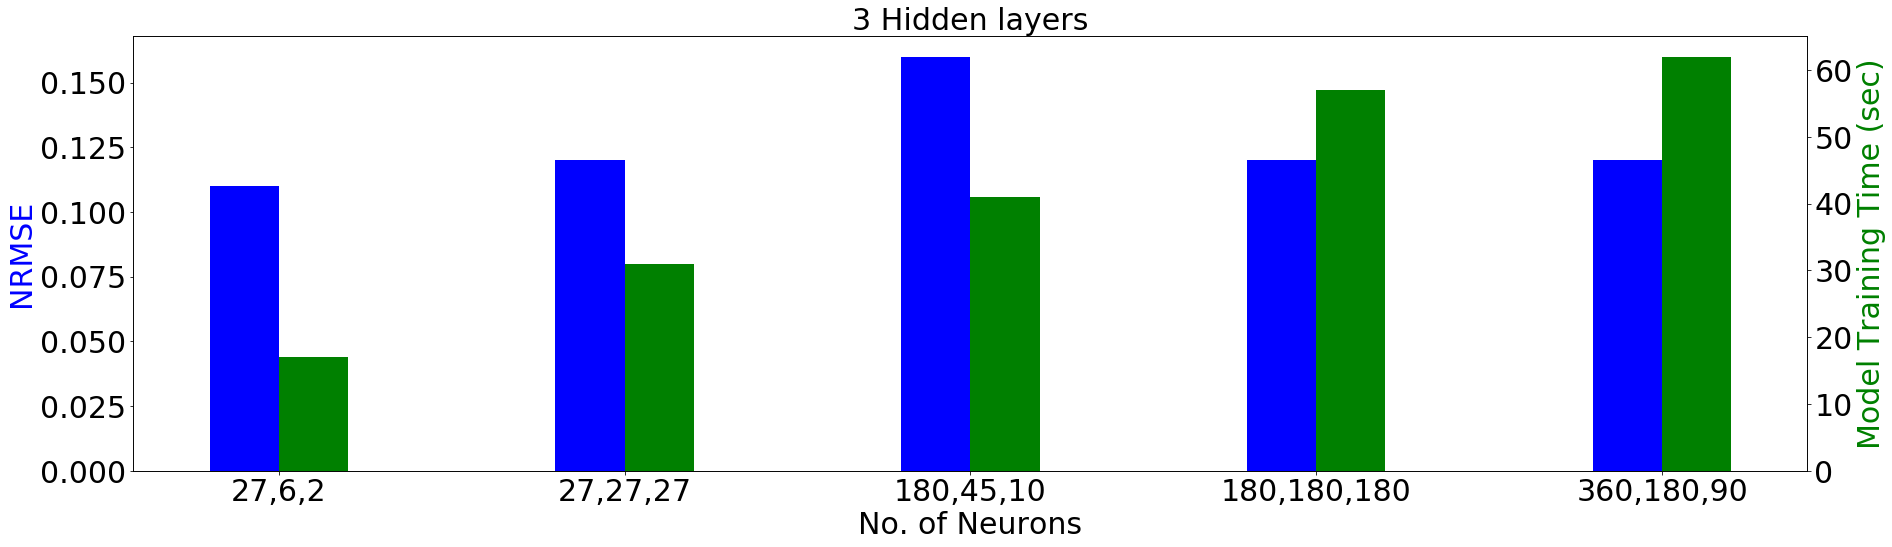

In [23]:
#Layer3-bar plot
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons3))
y= neurons3
plt.xticks(x, y, rotation=80)

w=0.2
lns1=ax1.bar(x-0.5*w,rmse3, color='b',label='NRMSE', width=w)
lns2=ax2.bar(x+0.5*w,time3,color='g',label='Time', width=w)

#legends
lns = [lns1,lns2]
labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE', color='b', fontsize=30)
ax2.set_ylabel('Model Training Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)


lowY1 = min(rmse3)
highY1 = max(rmse3)
lowY2 = min(time3)
highY2 = max(time3)
# ax1.set_ylim([math.ceil(lowY1-0.5*(highY1-lowY1)), math.ceil(highY1+0.5*(highY1-lowY1))])
# ax2.set_ylim([math.ceil(lowY2-0.5*(highY2-lowY2)), math.ceil(highY2+0.5*(highY2-lowY2))])

plt.title("3 Hidden layers", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer3.pdf', bbox_inches='tight')
plt.show()

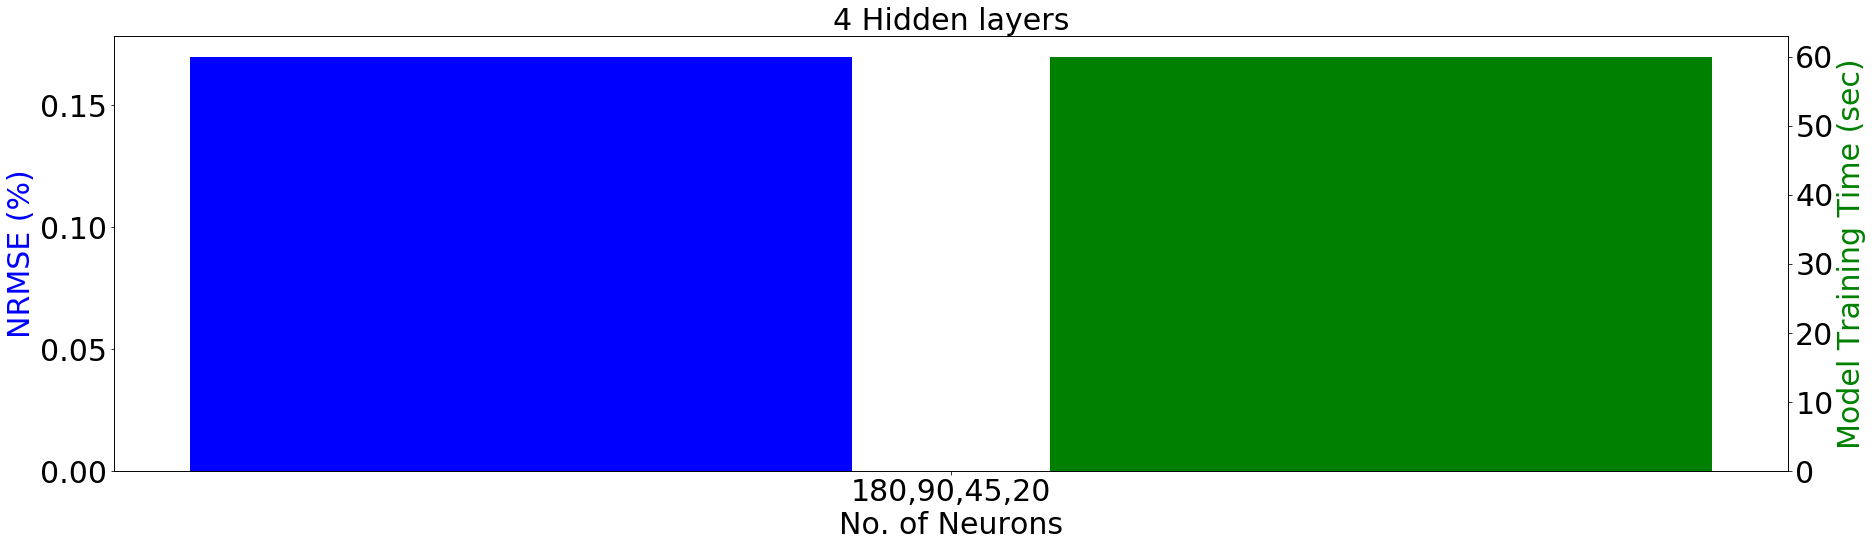

In [24]:
#Layer4-bar plot
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
ax2 = ax1.twinx()

x=np.arange(0,len(neurons4))
y= neurons4
plt.xticks(x, y, rotation=0)

w=0.2
lns1=ax1.bar(x-0.65*w,rmse4, color='b',label='NRMSE', width=w)
lns2=ax2.bar(x+0.65*w,time4,color='g',label='Time', width=w)

#legends
lns = [lns1,lns2]
labs = [l.get_label() for l in lns]
# ax1.legend(lns, labs, loc='upper left', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Neurons', fontsize=30)
ax1.set_ylabel('NRMSE (%)', color='b', fontsize=30)
ax2.set_ylabel('Model Training Time (sec)', color='g', fontsize=30)


ax1.tick_params(axis='both', which='both', labelsize=30)
ax2.tick_params(axis='both', which='both', labelsize=30)


lowY1 = min(rmse4)
highY1 = max(rmse4)
lowY2 = min(time4)
highY2 = max(time4)
# ax1.set_ylim([math.ceil(lowY1-0.5*(highY1-lowY1)), math.ceil(highY1+0.5*(highY1-lowY1))])
# ax2.set_ylim([math.ceil(lowY2-0.5*(highY2-lowY2)), math.ceil(highY2+0.5*(highY2-lowY2))])

plt.title("4 Hidden layers", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layer4.pdf', bbox_inches='tight')
plt.show()

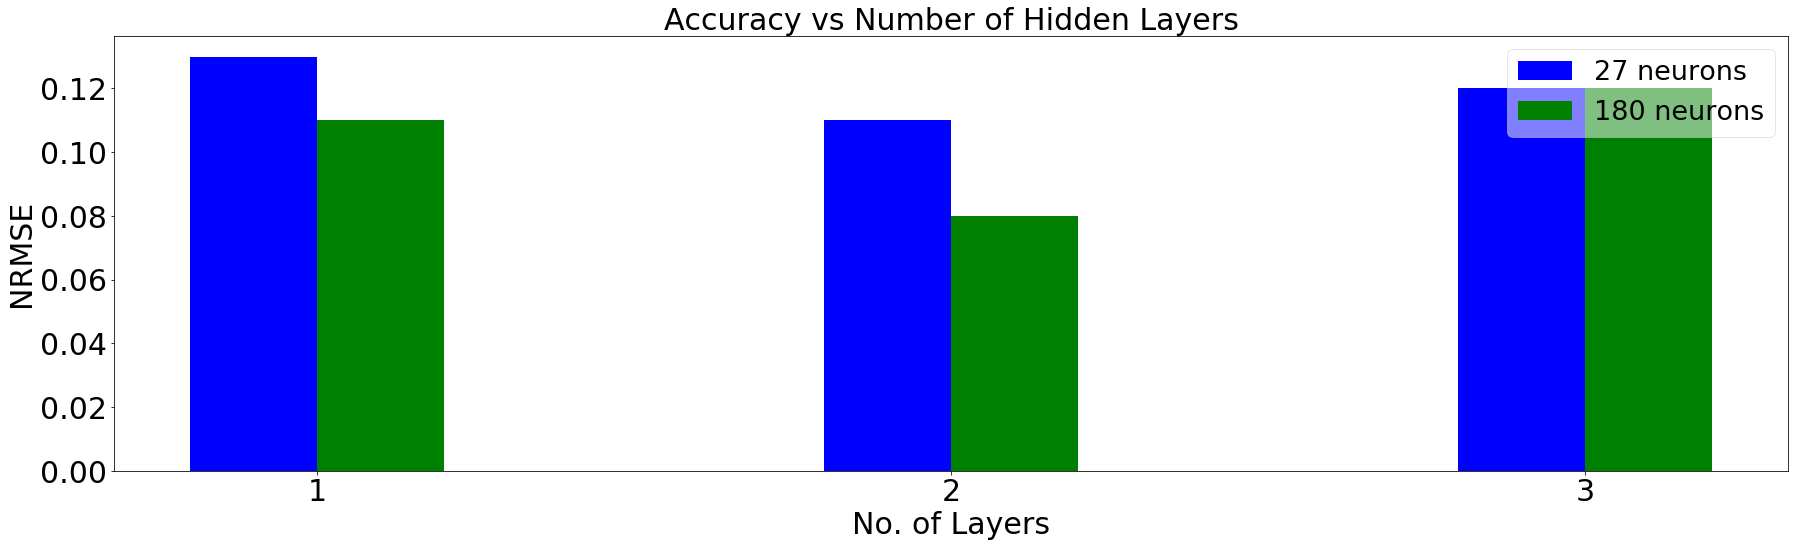

In [30]:
#Layer4-bar plot
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 8)
# ax2 = ax1.twinx()

x=np.arange(0,len(layers)-1)
y= layers
plt.xticks(x, y, rotation=0)

w=0.2
lns1=ax1.bar(x-0.5*w,rmse27, color='b',label='27 neurons', width=w)
lns2=ax1.bar(x+0.5*w,rmse180,color='g',label='180 neurons', width=w)

#legends
lns = [lns1,lns2]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right', fontsize=27,framealpha=0.5)

ax1.set_xlabel('No. of Layers', fontsize=30)
ax1.set_ylabel('NRMSE', color='black', fontsize=30)
# ax1.set_ylim(85, 92)

ax1.tick_params(axis='both', which='both', labelsize=30)

plt.title("Accuracy vs Number of Hidden Layers", fontsize=30)

# fig.savefig('test2png.png', dpi=100)
plt.savefig('Layers.pdf', bbox_inches='tight')
plt.show()